In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
files = glob.glob("./data/scan/221121/*.csv")
print(files)

# file
dfs =[]
sample_names =[]
for file in files[:]:
    dfs.append(pd.read_csv(file, index_col=0))
    sample_names.append(file[-33:-4])

print(sample_names)
dfs[0].head()

['./data/scan/221121\\2022-11-21-13-04-22_scan_VT2030108.csv', './data/scan/221121\\2022-11-21-14-45-16_scan_V12030108.csv', './data/scan/221121\\2022-11-21-19-01-21_scan_V22030108.csv', './data/scan/221121\\2022-11-21-19-05-19_scan_V32030108.csv']
['11-21-13-04-22_scan_VT2030108', '11-21-14-45-16_scan_V12030108', '11-21-19-01-21_scan_V22030108', '11-21-19-05-19_scan_V32030108']


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,delay_pp_slow,delay_pp_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/11/21 13:02:55,37.219238,24.470215,394255.0,721273.0,3625.716275,1652.327033,16.212572,10.828045,1.616968e+15,3.243283e+15,13.5,13.0
1,2022/11/21 13:02:58,37.181091,24.504929,385519.0,719147.0,3836.908248,1678.798534,4.971002,54.732819,1.617014e+15,3.243375e+15,13.5,13.0
2,2022/11/21 13:03:00,37.181091,24.488907,379077.0,721997.0,4029.665473,1678.577050,19.073966,68.403151,1.617060e+15,3.243468e+15,13.5,13.0
3,2022/11/21 13:03:02,37.199402,24.507599,369219.0,722254.0,4204.386161,1666.717779,43.853232,60.024193,1.617106e+15,3.243560e+15,13.5,13.0
4,2022/11/21 13:03:04,37.191772,24.528961,357483.0,723537.0,4360.056285,1653.332696,61.767510,54.832300,1.617152e+15,3.243653e+15,13.5,13.0


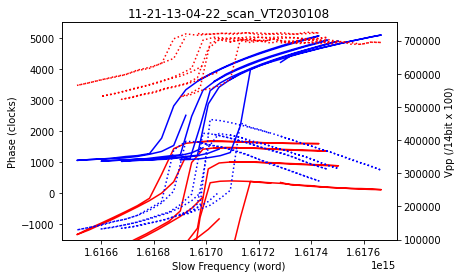

In [3]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

ax1.set_ylim(-1500,5500)


for df in dfs:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["vpp_sum1"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], color='r', linestyle="dotted")

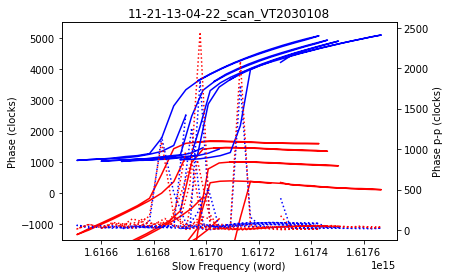

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Phase p-p (clocks)")
plt.title(sample_names[0])

ax1.set_ylim(-1500,5500)


for df in dfs:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["delay_pp_slow"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["delay_pp_fast"], color='r', linestyle="dotted")

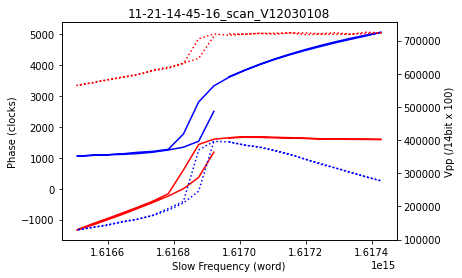

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[1])


for df in [dfs[0]]:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["vpp_sum1"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], color='r', linestyle="dotted")

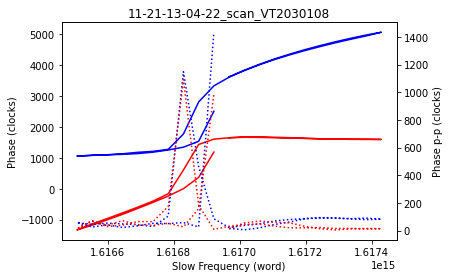

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Phase p-p (clocks)")
plt.title(sample_names[0])


for df in [dfs[0]]:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["delay_pp_slow"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["delay_pp_fast"], color='r', linestyle="dotted")

In [7]:
labels =["25deg", "15deg", "15deg", "35deg", "35deg", "25deg"]

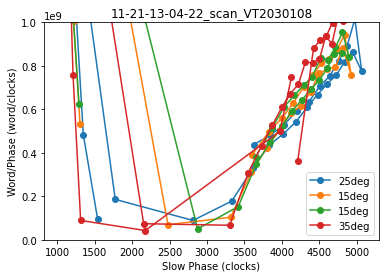

In [8]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Slow Phase (clocks)")
ax1.set_ylabel("Word/Phase (word/clocks)")
plt.title(sample_names[0])

ax1.set_ylim(0,1e9)

for i, df in enumerate(dfs):
    delta_slow = np.array([df["delay_slow"][i+1]-  df["delay_slow"][i] for i in range(len(df)-1)])
    delta_Ch2_word = np.array([df["Ch2_word"][i+1]-  df["Ch2_word"][i] for i in range(len(df)-1)])
    ax1.plot(df["delay_slow"][:-1], delta_Ch2_word/delta_slow, "-o", label=labels[i])
    
ax1.legend()


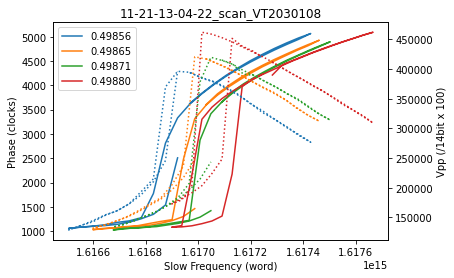

In [9]:
labels =["0.49856", "0.49865", "0.49871", "0.49880"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate(dfs):
    ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    #ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()

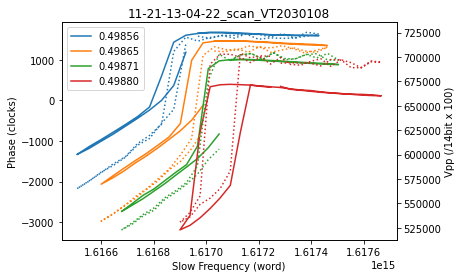

In [10]:
labels =["0.49856", "0.49865", "0.49871", "0.49880"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate(dfs):
    #ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()